In [7]:
class Task:
    key = []
    msg = []
    enc = []

    def __str__(self) -> str:
        return f'key: {self.key}\nmsg: {self.msg}\nenc: {self.enc}'

In [11]:
import ast

with open('./logs.txt') as logfile:
    lines = logfile.readlines()

task = Task()

for line in lines:
    key, value = line.split('=')
    if 'key' in key:
        task.key = ''.join(ast.literal_eval(value))
    elif 'msg' in key:
        task.msg = ''.join(ast.literal_eval(value))
    elif 'enc' in key:
        task.enc = ''.join(ast.literal_eval(value))

In [14]:
from collections import Counter
import matplotlib.pyplot as plt

def count_ngrams(data, n = 2):
    chunks = [data[i:i+n] for i in range(0, len(data), n)]
    return Counter(chunks)

<BarContainer object of 16 artists>

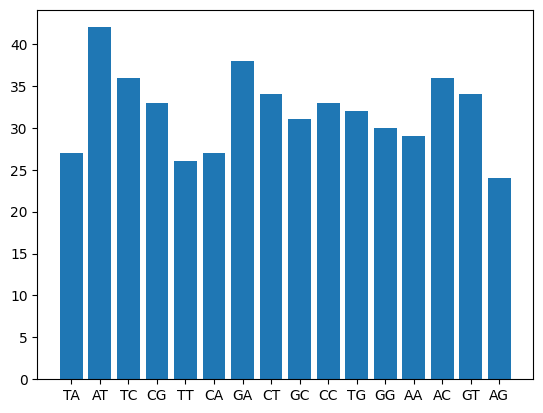

In [15]:
keys_2 = count_ngrams(task.key)
plt.bar(keys_2.keys(), keys_2.values())

<BarContainer object of 15 artists>

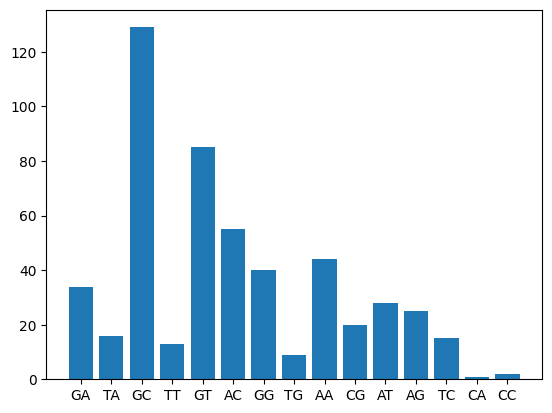

In [16]:
msgs_2 = count_ngrams(task.msg)
plt.bar(msgs_2.keys(), msgs_2.values())

<BarContainer object of 16 artists>

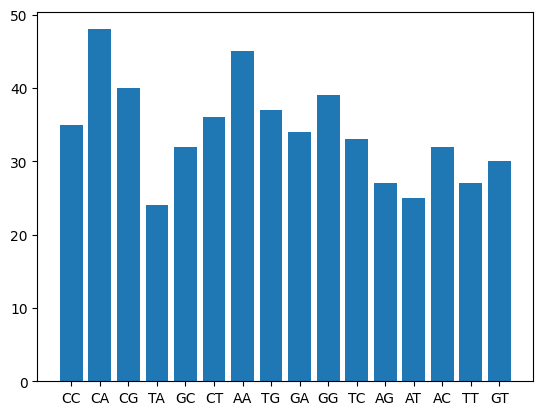

In [17]:
encs_2 = count_ngrams(task.enc)
plt.bar(encs_2.keys(), encs_2.values())

<BarContainer object of 169 artists>

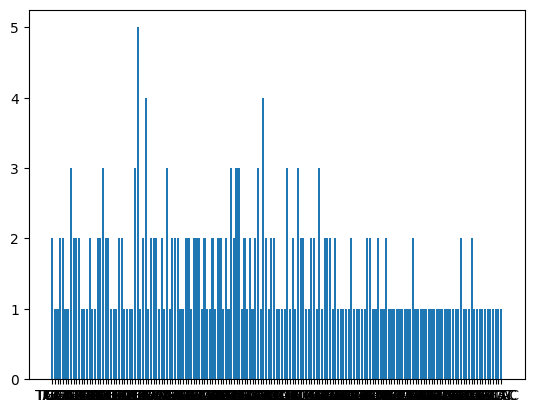

In [18]:
keys_4 = count_ngrams(task.key, n = 4)
plt.bar(keys_4.keys(), keys_4.values())

<BarContainer object of 28 artists>

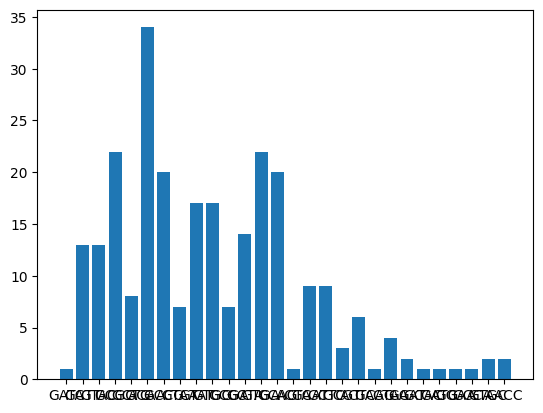

In [19]:
msgs_4 = count_ngrams(task.msg, n = 4)
plt.bar(msgs_4.keys(), msgs_4.values())

<BarContainer object of 164 artists>

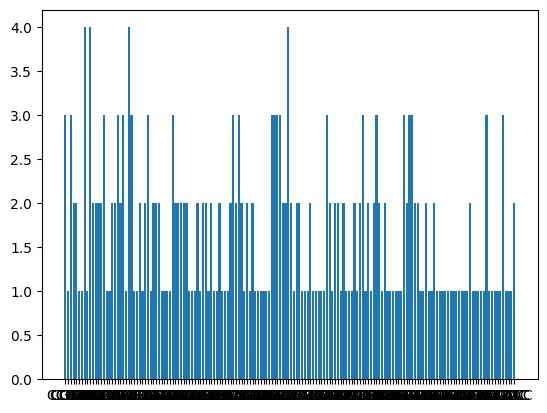

In [20]:
encs_4 = count_ngrams(task.enc, n = 4)
plt.bar(encs_4.keys(), encs_4.values())